<a href="https://colab.research.google.com/github/franklinhamer2727/Apuntes-de-IA/blob/main/Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from  scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib  inline



In [2]:
#asigno los datos a un dataframe
df_train = pd.read_csv('train.csv')
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

El problema relamente el conjunto de datos, voy a estudiar el significado y la relevancia de cada variable con respecto al problema. Intentare responder a diversas sobre ellas

- La relevancia de la varibale en la compra de  una casa
- La importancia de la variable
-  Solapamiento con otras variables

Se indica qie el problema es la prediccion  del precio de las viviendad, por lo que la variable objetivo es 'salaprice' las demas se describen de la siguiente manera

- MSSubClass: clases de contruccion
- MsZoning: clasificaion de la zona
- LotFrontage: pies lineales de calle de la parcela.
- LotArea: tamaño de la parcela en pies cuadrados.
- Street: tipo de acceso por carretera.
- Alley: tipo de acceso al callejón.
- LotShape: forma de la parcela
- LandContour: planitud de la parcela
- Utilities: servicios públicos disponibles.
- LotConfig: Configuración de parcela.
- LandSlope: pendiente de la parcela.
- Neighborhood: ubicación física dentro de los límites de la ciudad de Ames
- Condition1: proximidad a la carretera principal o al ferrocarril
- Condition2: proximidad a la carretera principal o al ferrocarril (si hay un segundo)
- BldgType: tipo de vivienda
- HouseStyle: estilo de vivienda
- OverallQual: calidad general del material y del acabado
- OverallCond: condición general
- YearBuilt: fecha original de construcción
- YearRemodAdd: fecha de remodelación
- RoofStyle: tipo de cubierta
- RoofMatl: material del techo
- Exterior1st: revestimiento exterior de la casa
- Exterior2nd: revestimiento exterior de la casa (si hay más de un material)
- MasVnrType: tipo de revestimiento de mampostería
- MasVnrArea: área de revestimiento de mampostería en pies cuadrados
- ExterQual: calidad del material exterior
- ExterCond: estado del material en el exterior
- Foundation: tipo de cimentación
- BsmtQual: altura del sótano
- BsmtCond: estado general del sótano
- BsmtExposure: paredes del sótano a nivel de calle o de jardín
- BsmtFinType1: calidad del área acabada del sótano
- BsmtFinSF1: pies cuadrados de la superficie acabada tipo 1
- BsmtFinType2: calidad de la segunda superficie acabada (si existe)
- BsmtFinSF2: Pies cuadrados de la superficie acabada tipo 2
- BsmtUnfSF: pies cuadrados del área sin terminar del sótano
- TotalBsmtSF: pies cuadrados totales del sótano
- Heating: tipo de calefacción
- HeatingQC: calidad y estado de la calefacción
- CentralAir: aire acondicionado central
- Electrical: sistema eléctrico
- 1erFlrSF: área en pies cuadrados de la primera planta (o planta baja)
- 2ndFlrSF: área en pies cuadrados de la segunda planta
- LowQualFinSF: pies cuadrados acabados de baja calidad (todos los pisos)
- GrLivArea: superficie habitable por encima del nivel del suelo en pies cuadrados
- BsmtFullBath: cuartos de baño completos en el sótano
- BsmtHalfBath: medio baño del sótano
- FullBath: baños completos sobre el nivel del suelo
- HalfBath: medios baños sobre el nivel del suelo
- Bedroom: número de dormitorios por encima del nivel del sótano
- Kitchen: número de cocinas
- KitchenQual: calidad de la cocina
- TotRmsAbvGrd: total de habitaciones por encima del nivel del suelo (no incluye baños)
- Functional: valoración de la funcionalidad de la vivienda
- Fireplaces: número de chimeneas
- FireplaceQu: calidad de la chimenea
- GarageType: ubicación del garaje
- GarageYrBlt: año de construcción del garaje
- GarageFinish: acabado interior del garaje
- GarageCars: tamaño del garaje en capacidad de coches
- GarageArea: tamaño del garaje en pies cuadrados
- GarageQual: calidad de garaje
- GarageCond: condición de garaje
- PavedDrive: calzada asfaltada
- WoodDeckSF: area de plataforma de madera en pies cuadrados
- OpenPorchSF: área de porche abierto en pies cuadrados
- EnclosedPorch: área de porche cerrada en pies cuadrados
- 3SsnPorch: área de porche de tres estaciones en pies cuadrados
- ScreenPorch: superficie acristalada del porche en pies cuadrados
- PoolArea: área de la piscina en pies cuadrados
- PoolQC: calidad de la piscina
- Fence: calidad de la valla
- MiscFeature: característica miscelánea no cubierta en otras categorías
- MiscVal: valor en dólares de la característica miscelánea
- MoSold: mes de venta
- YrSold: año de venta
- SaleType: tipo de venta
- SaleCondition: Condiciones de venta.

##Analisis univaribale 'SalePrice'

La varibale 'SalePrice' es la varibale object de este conjunto de datos
En pasos posteriores a este analisis exploratoriode datos se realizaria un prediccion del valor de esta varibale, por lo que voy a estudiarlo con mayor detenimiento.




In [22]:
df_train.info



<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

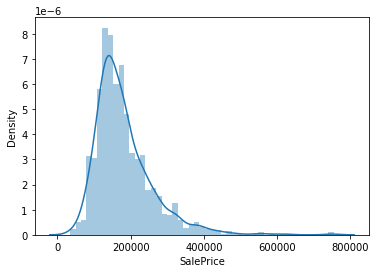

In [6]:
#Histograma
sns.distplot(df_train['SalePrice']);

A simple vista se pueden observar:
- Una desviacion con respecto a la distribucion normal
- Una asimetria positiva
- Algunso picos-

In [7]:
#Asimetria y curtosis
print("Skewness: %f" %df_train['SalePrice'].skew())
print("Kurtosis: %f" %df_train['SalePrice'].kurt())


Skewness: 1.882876
Kurtosis: 6.536282


###Relacion con varibvales numericas




In [8]:
var_inde = 'GrLivArea'
var_depe = 'SalePrice'

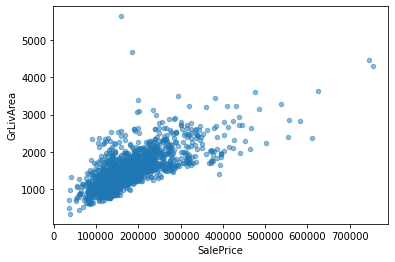

In [18]:
data = pd.concat([df_train[var_depe],df_train[var_inde]], axis=1)#se esta creando una dataframe solo con la variable dependiente e independiente
data.plot.scatter(x=var_inde,y=var_depe, alpha=0.5)


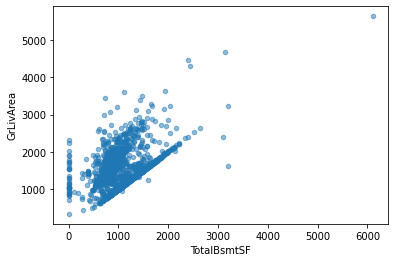

In [21]:
var_inde = 'TotalBsmtSF'
data = pd.concat([df_train[var_depe],df_train[var_inde]],axis=1)
data.plot.scatter(x= var_inde,y=var_depe,alpha=0.5)


Un diagrama de cajas(boxplots) muestra la distribución de datos cuantitativos de una manera que facilita las comparaciones entre variables o entre niveles de uuna varibale categorica.

El cuadro muestra los cuartiles del conjunto de datos, mientras que los bigotes se extienden para mostrar el resto de la distribucion a excepcion de los puyntos que se determinan como "valores atipicos"

(-0.5, 9.5, 0.0, 6000.0)

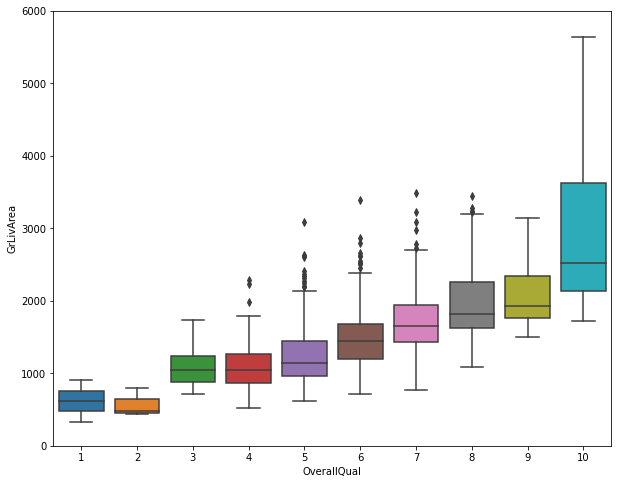

In [26]:
#Relacion con variables cateogoricas

var = 'OverallQual'
data = pd.concat([df_train[var_depe],df_train[var]],axis= 1)
f, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x= var,y= var_depe, data=data)
fig.axis(ymin=0,ymax=6000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

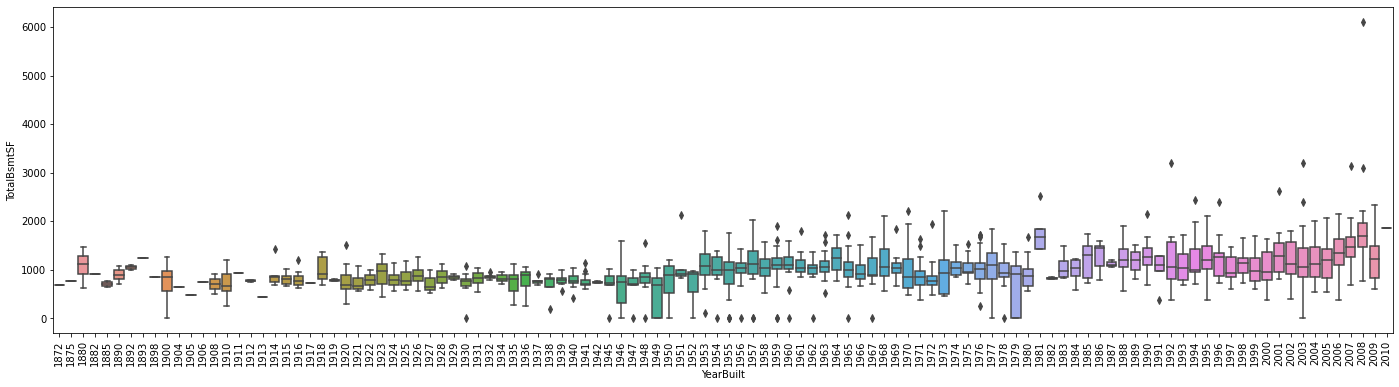

In [28]:
var_depe = 'YearBuilt'
data = pd.concat([df_train[var_inde],df_train[var_depe]],axis=1)
f,ax = plt.subplots(figsize=(24,6))
fi = sns.boxplot(x= var_depe, y =var_inde, data=data)
fig.axis(ymin=0,ymax=80000)
plt.xticks(rotation=90)

###Resumiendo
- GrLivArea  y TotalBsmySF mantiene una relacion lineal positiva con 'SalePrice' aumentando en el mismo sentido. En el caso de 'TotalBsmSF', la pendiente de esta relacion es muy acentuada
- 'OverallQual' y 'YearBuilt' también parecen relacionadas con 'SalePrice' (más fuerte en el primer caso), tal y como se puede observar en los diagramas de cajas.

###Analisis multivariables
Para ello se realiza las siguientes pruebas de correlacion
- Matriz de correlacion general
- Matriz de correlacion centrada en la variable 'SalePrice'
- Diagramas de dispersion entre las variables mas correlacionadas


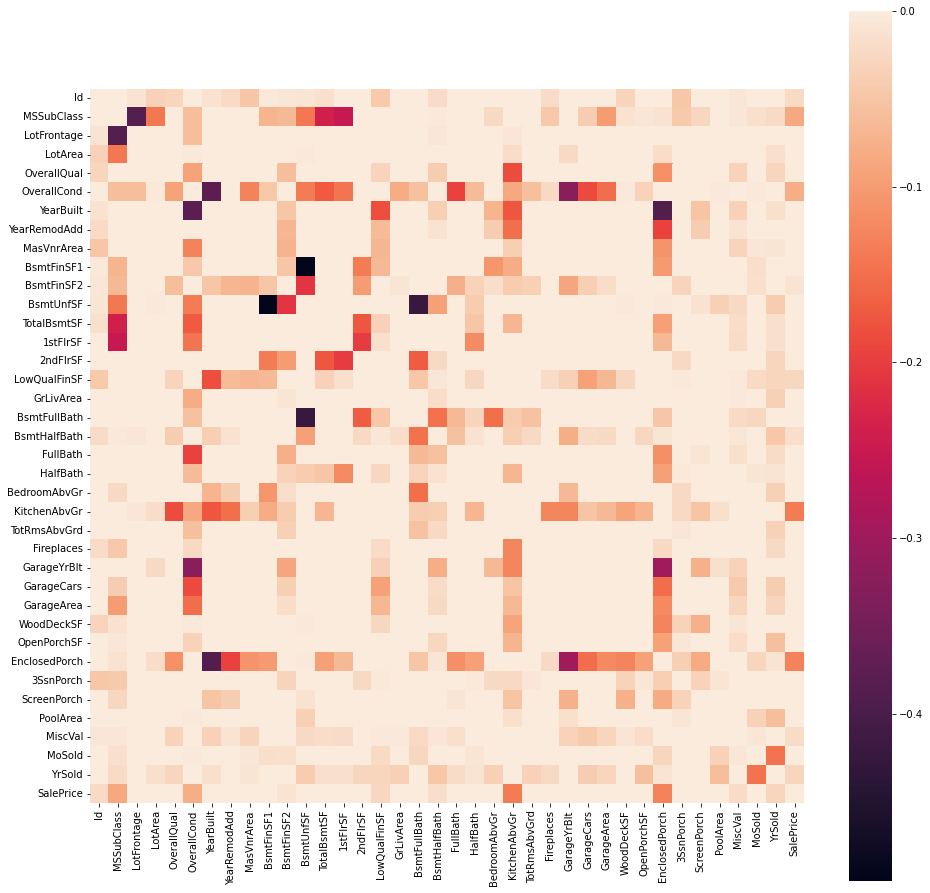

In [31]:
corrmat = df_train.corr()
f,ax = plt.subplots(figsize=(16,16))
sns.heatmap(corrmat,vmax=0, square =True)


El mapa de calor es una forma visual muy util para conocer las varibales y sus correlaciones.A primera vista hay dos tipos de variables que llamasn la atencion 'TotalBsmtSf' y '1stFlrSF' seguidas  por las variables 'GarageX' 

Enn ambos casos parece haber una correlacion significativa; en realizada es tan fuerte que podira indicar multicolinealidad, es decir, que baiscamente ofrecen la misma informacion